In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [27]:
data=pd.read_csv('C:/Users/kaism/Desktop/csv/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
data.isnull().sum().sum()

0

In [30]:
# correlation matrix
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


# Linear regression

In [31]:
#extract X and Y from data 
x=data["sqft_living"].values[:,np.newaxis]
y=data["price"].values

In [32]:
#Split your dataset into a training set and a testing set. 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

In [33]:
#Apply Linear regression to your training set. 
model=LinearRegression()   
model.fit(x_train,y_train)    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

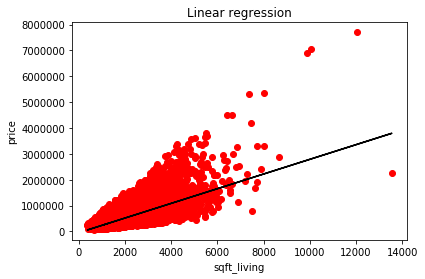

In [34]:
#Plot the linear regression.
plt.scatter(x_train,y_train,color='r')
plt.title('Linear regression')
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x_train,model.predict(x_train),color='k')
plt.show()

In [35]:
#Measure the performance of linear regression using the testing set. 
predicted=model.predict(x_test)
print("MSE",mean_squared_error(y_test,predicted))
print("R Squared",metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R Squared 0.4996528488387417


In [36]:
# multi-linear regression
X=data[["sqft_living","grade"]]
Y=data["price"].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35,random_state=40)
model=LinearRegression()
model.fit(X_train,Y_train)
predicted1=model.predict(X_test)
print("MSE",mean_squared_error(Y_test,predicted1))
print("R Squared",metrics.r2_score(Y_test,predicted1))

MSE 57413775762.86427
R Squared 0.5433112989852685


In [48]:
#Polynomial regression
poly=PolynomialFeatures(degree=2)
X_train_fit=poly.fit_transform(X_train)
lg=LinearRegression()
lg.fit(X_train_fit,Y_train)
X_test_fit=poly.fit_transform(X_test)
predicted2=lg.predict(X_test_fit)
print("MSE",mean_squared_error(Y_test,predicted2))
print("R Squared",metrics.r2_score(Y_test,predicted2))


MSE 50394480701.174934
R Squared 0.5991451594337126
